In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
DATA_PATH = "/home/brandon/Documents/Data Science/Final-Project-Climate-Change/"
global_temperatures = pd.read_csv(DATA_PATH + "GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])

global_temperatures['Year'] = global_temperatures['dt'].apply(lambda x: x.year)
global_temperatures['Month'] = global_temperatures['dt'].apply(lambda x: x.month)

global_temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,1
3,1744-02-01,NaN,NaN,Åland,1744,2
4,1744-03-01,NaN,NaN,Åland,1744,3


In [10]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

In [11]:
global_temperatures['Season'] = global_temperatures['Month'].apply(get_season)
global_temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month,Season
0,1743-11-01,4.384,2.294,Åland,1743,11,Autumn
1,1743-12-01,NaN,NaN,Åland,1743,12,Winter
2,1744-01-01,NaN,NaN,Åland,1744,1,Winter
3,1744-02-01,NaN,NaN,Åland,1744,2,Winter
4,1744-03-01,NaN,NaN,Åland,1744,3,Spring


In [13]:
years = global_temperatures['Year'].drop_duplicates().values

spring = []
summer = []
autumn = []
winter = []

for year in years:
    data = global_temperatures[global_temperatures['Year'] == year]
    spring.append(data[data['Season']=='Spring']['AverageTemperature'].mean())
    summer.append(data[data['Season']=='Summer']['AverageTemperature'].mean())
    autumn.append(data[data['Season']=='Autumn']['AverageTemperature'].mean())
    winter.append(data[data['Season']=='Winter']['AverageTemperature'].mean())

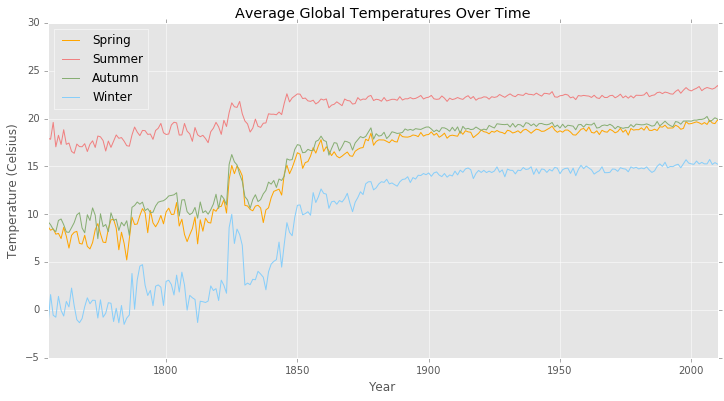

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(years, spring, label='Spring', c='orange')
plt.plot(years, summer, label='Summer', c='lightcoral')
plt.plot(years, autumn, label='Autumn', c='sage')
plt.plot(years, winter, label='Winter', c='lightskyblue')
plt.legend(loc='best')
plt.grid(True)
plt.xlim(1755, 2010)
plt.title("Average Global Temperatures Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

### In seperating the data by season, we can observe any seasonal changes that might have occured over a period of time.  Additionally, we can prevent the influence of seasonal changes being a factor when analyzing average temperatures across each year as a whole. (e.g. isolating every summer of each year)